### Test Output 
For all files 
1. Verify if each row has the age between MIN and Max
2. Verify if each elector_name length
3. Verify if each father_or_husband_name length
4. Verify if each id length
5. Verfy number of male against the net male
6. Verfy number of female against the net female
7. verify if the total matches with the data
8. verify the unique sex values count
9. verify the unique relationship values count
10. Count the original and amendaments list

In [1]:
import pandas as pd
import os

In [2]:
DEFAULT_MIN_AGE = 18
DEFAULT_MAX_AGE = 100
DEFAULT_NAME_MIN_LENGTH = 3
DEFAULT_PIN_MIN_LENGTH = 6
DEFAULT_ID_MIN_LENGTH = 4

csvs_path = '../parseData/csvs/bihar/'
files = os.listdir(csvs_path)
COLUMNS = ['file_name','total_records_found','no_of_missing_records','nan_in_number','no_of_males_found','no_of_males_claimed','no_of_females_found','no_of_females_claimed','age_pass_cases','age_fail_cases',
           'elector_name_length_pass_cases','elector_name_length_fail_cases','father_or_husband_name_length_pass_cases','father_or_husband_name_length_fail_cases','id_length_pass_cases','id_length_fail_cases',
          'unique_sex_values','unique_relationship','original','amendaments','unique_main_town','unique_mandal','unique_district','unique_pin_code','unique_ac_name','unique_parl_constituency','unique_police_station',
          'unique_revenue_division']

In [3]:
def get_total_records_found():
    total_records_found = len(df)
    return total_records_found

def get_no_of_missing_records():
    
    if df['net_electors_total'][0]>= len(df):
        no_of_missing_records = df['net_electors_total'][0] - len(df)
        return no_of_missing_records
    else:
        return 0

def get_nan_in_number():
    return df['number'].isna().sum()

def get_no_of_males_found():
    temp_df = df[(df['sex']=='पुरूष')]
    return len(temp_df)

def get_no_of_females_found():
    temp_df = df[(df['sex']=='महिला')]
    return len(temp_df)

def get_no_of_males_claimed():
    if df['net_electors_male'][0]:
        return df['net_electors_male'][0]
    
def get_no_of_females_claimed():
    if df['net_electors_female'][0]:
        return df['net_electors_female'][0]

def get_age_pf_cases(total_records):
    temp_df = df[(DEFAULT_MIN_AGE <= df['age']) & (df['age'] <= DEFAULT_MAX_AGE)]
    
    return len(temp_df), total_records-len(temp_df)

def get_ename_pf_cases(total_records):
    temp_df = df[(DEFAULT_NAME_MIN_LENGTH <= df['elector_name'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def get_fhname_pf_cases(total_records):
    temp_df = df[(DEFAULT_NAME_MIN_LENGTH <= df['father_or_husband_name'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def get_id_length_pf_cases(total_records):
    temp_df = df[(DEFAULT_ID_MIN_LENGTH <= df['id'].str.len())]
    return len(temp_df), total_records-len(temp_df)

def get_amend_original():
    data = df['original_or_amendment'].value_counts()
    
    if len(data)==2:
        return data[0],data[1]
    else:
        return data[0],0

def missing_to_typecast(column,default_value,datatype):
    df[column] = df[column].fillna(default_value)
    df[column] = df[column].astype(datatype)

def get_unique_list(column):
    unique_list = df[column].unique()
    
    return unique_list

def save_to_csv(dataframe, full_filepath):
    
    if dataframe.empty:
        return 
    else :       
        dataframe.to_csv(full_filepath,index=False)

In [4]:
stat_df = pd.DataFrame(columns = COLUMNS)

for file in files:
    
    if not file.endswith('csv'):
        continue
    
    df = pd.read_csv(csvs_path+file,low_memory=False)
    
    missing_to_typecast('age',0,'int')
    missing_to_typecast('net_electors_male',0,'int')
    missing_to_typecast('net_electors_female',0,'int')
    missing_to_typecast('net_electors_total',0,'int')
    
    total_records_found = get_total_records_found()
    no_of_missing_records = get_no_of_missing_records()
    nan_in_number = get_nan_in_number()
    no_of_males_found = get_no_of_males_found()
    no_of_males_claimed = get_no_of_males_claimed()
    no_of_females_found = get_no_of_females_found()
    no_of_females_claimed = get_no_of_females_claimed()
    age_pass_cases,age_fail_cases = get_age_pf_cases(total_records_found)
    elector_name_length_pass_cases,elector_name_length_fail_cases = get_ename_pf_cases(total_records_found)
    father_or_husband_name_length_pass_cases,father_or_husband_name_length_fail_cases = get_fhname_pf_cases(total_records_found)
    id_length_pass_cases,id_length_fail_cases = get_id_length_pf_cases(total_records_found)
    unique_sex_values = get_unique_list('sex')
    unique_relationship = get_unique_list('relationship')
    original,amendaments = get_amend_original()
    
    final_list = [file,total_records_found,no_of_missing_records,nan_in_number,no_of_males_found,no_of_males_claimed,
                no_of_females_found,no_of_females_claimed,age_pass_cases,age_fail_cases,elector_name_length_pass_cases,elector_name_length_fail_cases,
                father_or_husband_name_length_pass_cases,father_or_husband_name_length_fail_cases,
                id_length_pass_cases,id_length_fail_cases,unique_sex_values,unique_relationship,original,amendaments,
                df['main_town'][0],df['mandal'][0],df['district'][0],df['pin_code'][0],df['ac_name'][0],df['parl_constituency'][0],df['police_station'][0],df['revenue_division'][0]]
        
    df_length = len(stat_df)
    stat_df.loc[df_length] = final_list
    
    print("new row has been added ",file)

new row has been added  FinalRoll_ACNo_9PartNo_17.csv
new row has been added  FinalRoll_ACNo_60PartNo_1.csv
new row has been added  FinalRoll_ACNo_7PartNo_1.csv
new row has been added  FinalRoll_ACNo_77PartNo_90.csv
new row has been added  FinalRoll_ACNo_22PartNo_6.csv
new row has been added  FinalRoll_ACNo_60PartNo_89.csv
new row has been added  FinalRoll_ACNo_9PartNo_9.csv
new row has been added  FinalRoll_ACNo_1PartNo_2.csv
new row has been added  FinalRoll_ACNo_61PartNo_15.csv
new row has been added  FinalRoll_ACNo_92PartNo_5.csv
new row has been added  FinalRoll_ACNo_92PartNo_261.csv
new row has been added  FinalRoll_ACNo_1PartNo_6.csv
new row has been added  FinalRoll_ACNo_224PartNo_3.csv
new row has been added  FinalRoll_ACNo_1PartNo_14.csv
new row has been added  FinalRoll_ACNo_204PartNo_91.csv
new row has been added  FinalRoll_ACNo_116PartNo_1.csv
new row has been added  FinalRoll_ACNo_77PartNo_10.csv
new row has been added  FinalRoll_ACNo_54PartNo_10.csv
new row has been adde

In [5]:
stat_df

,file_name,total_records_found,no_of_missing_records,nan_in_number,no_of_males_found,no_of_males_claimed,no_of_females_found,no_of_females_claimed,age_pass_cases,age_fail_cases,...,original,amendaments,unique_main_town,unique_mandal,unique_district,unique_pin_code,unique_ac_name,unique_parl_constituency,unique_police_station,unique_revenue_division
0,FinalRoll_ACNo_9PartNo_17.csv,1012,1,567,536,540,469,472,950,62,...,1011,1,जीगना,नरकटियागंज,पश्चिम चम्पारण,845451,9 - सिकटा (सामान्य),1- वाल्मीकिनगर (सामान्य),मानपुर,10
1,FinalRoll_ACNo_60PartNo_1.csv,872,4,442,455,457,412,419,828,44,...,872,0,महीखंड,धमदाहा,पूर्णियां,854334,60 - रुपौली (सामान्य),12 - पूर्णिया (सामान्य),बड़हरा कोठी,32
2,FinalRoll_ACNo_7PartNo_1.csv,928,0,615,495,495,433,433,889,39,...,911,17,मुशहरी,बेतिया,पश्चिम चम्पारण,845450,7 - चनपटिया (सामान्य),2- पश्चिम चम्पारण (सामान्य,चनपटिया,1
3,FinalRoll_ACNo_77PartNo_90.csv,1172,4,789,576,583,587,593,1111,61,...,1154,18,खरका तेलवा,सहरसा,सहरसा,852123,77 - महिषी (सामान्य),13 - मधेपुरा (सामान्य),नवहट््‌टा,6
4,FinalRoll_ACNo_22PartNo_6.csv,829,0,527,431,433,388,389,787,42,...,809,20,चिरैया,शिवहर,शिवहर,843334,22 - शिवहर (सामान्य),4- शिवहर (सामान्य),पुरनहिया,1
5,FinalRoll_ACNo_60PartNo_89.csv,1371,0,831,719,None,644,None,1312,59,...,1363,8,सुरैती,धमदाहा,पूर्णियां,854204,60 - रुपौली (सामान्य),12 - पूर्णिया (सामान्य),भवानीपुर,8
6,FinalRoll_ACNo_9PartNo_9.csv,1312,0,676,688,698,607,610,1253,59,...,1176,136,लौकर,नरकटियागंज,पश्चिम चम्पारण,845451,9 - सिकटा (सामान्य),1- वाल्मीकिनगर (सामान्य),मानपुर,1
7,FinalRoll_ACNo_1PartNo_2.csv,739,2,488,385,390,351,351,720,19,...,717,22,पीपरा कुट्‌टी,बगहा,पश्चिम चम्पारण,845107,1 - वाल्मीकिनगर (सामान्य),1- वाल्मीकिनगर (सामान्य),वाल्मीकिनगर,5
8,FinalRoll_ACNo_61PartNo_15.csv,1041,2,583,563,565,477,478,991,50,...,918,123,अमारी,धमदाहा,पूर्णियां,854205,61 - धमदाहा (सामान्य),12 - पूर्णिया (सामान्य),धमदाहा,37
9,FinalRoll_ACNo_92PartNo_5.csv,804,0,546,432,435,365,369,755,49,...,786,18,सम्भा,मुजफ्फरपुर (पूर्वी),मुजफ्फरपुर,843119,92 - सकरा (अ० जा०),15 - मुजफ्फरपुर (सामान्य),सकरा,4


<AxesSubplot:title={'center':'Age, Name, Id Pass/Fail cases'}, xlabel='file_name'>

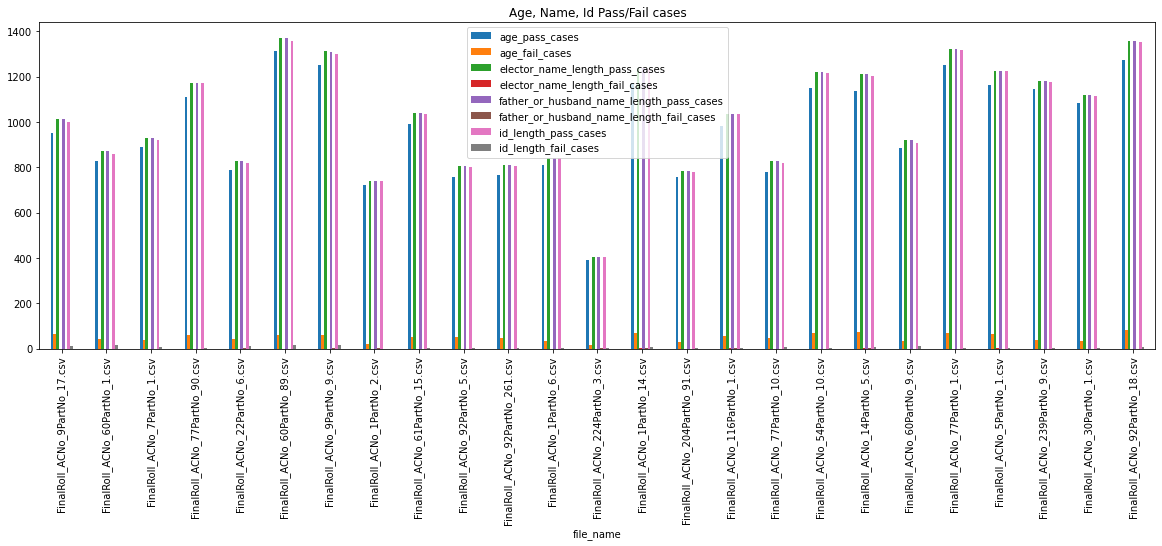

In [6]:
stat_df.plot(x="file_name",y=["age_pass_cases", "age_fail_cases","elector_name_length_pass_cases","elector_name_length_fail_cases","father_or_husband_name_length_pass_cases","father_or_husband_name_length_fail_cases",
             "id_length_pass_cases","id_length_fail_cases"], kind="bar",figsize=(20,6),title='Age, Name, Id Pass/Fail cases')


<AxesSubplot:xlabel='file_name'>

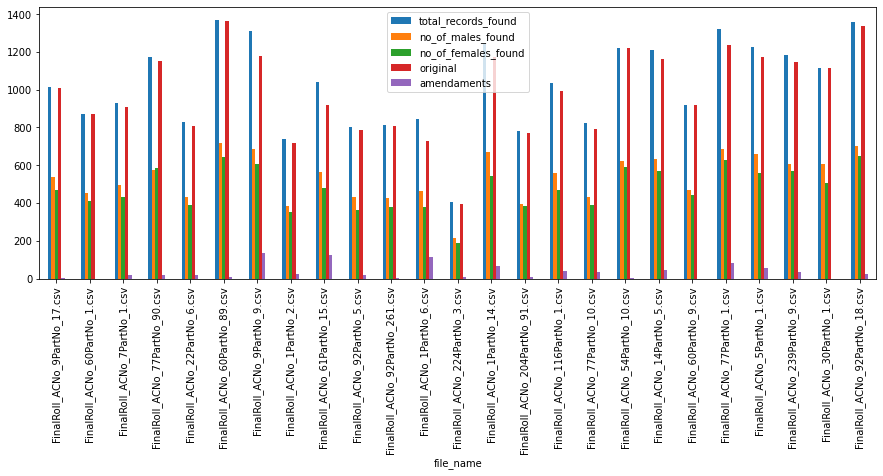

In [7]:
stat_df.plot(x="file_name", y=["total_records_found","no_of_males_found","no_of_females_found","original","amendaments"], kind="bar",figsize=(15,5))


In [8]:
total_unique_main_towns = (stat_df['unique_main_town'].value_counts()==1).sum()
print("total unique main towns ",total_unique_main_towns)

total_unique_mandals = (stat_df['unique_mandal'].value_counts()==1).sum()
print("total unique mandals ",total_unique_mandals)

total_unique_districts = (stat_df['unique_district'].value_counts()==1).sum()
print("total unique districts ",total_unique_districts)

total_unique_pincodes = (stat_df['unique_pin_code'].value_counts()==1).sum()
print("total unique pincodes ",total_unique_pincodes)

total_unique_ac_name = (stat_df['unique_ac_name'].value_counts()==1).sum()
print("total unique ac names ",total_unique_ac_name)

total_unique_parl_constituency = (stat_df['unique_parl_constituency'].value_counts()==1).sum()
print("total unique parl constituency ",total_unique_parl_constituency)

total_unique_police_station = (stat_df['unique_police_station'].value_counts()==1).sum()
print("total unique police station ",total_unique_police_station)

total_unique_revenue_division = (stat_df['unique_revenue_division'].value_counts()==1).sum()
print("total unique revenue division ",total_unique_revenue_division)



total unique main towns  25
total unique mandals  9
total unique districts  8
total unique pincodes  18
total unique ac names  11
total unique parl constituency  7
total unique police station  12
total unique revenue division  8


In [9]:
save_to_csv(stat_df,"final_test_report.csv")